In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [3]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Bag of words feature representation for descriptive text

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 13767)

### fit Kmeans

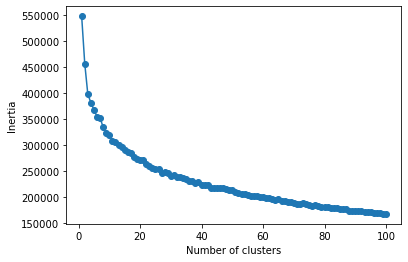

In [5]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=35,n_init=30)
km.fit(X)


# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### labels are named with integers and stored in the `labels_` attribute

In [6]:
km.labels_

array([57, 82, 44, ..., 61, 72, 72], dtype=int32)

### take a look at one of the cluster results

In [8]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 20:
        print(raw_data['product_description'][i])
        print('**********')

Finest Traditions,	Strawberry Yogurt Cheesecake Dessert,	1/5 lb.,		10 733147 11018 5,	11/20/2013 - 12/9/2013;  Garden-Fresh,	Strawberry Yogurt Cheesecake Dessert,	1/5 lb.,		0 11 11596 55028 8	11/25/2013 - 12/7/2013;  Old Tyme,	Strawberry Yogurt Cheesecake Dessert,	1/5 lb.,		0 94776 03303 4,	11/26/2013 - 11/29/2013  ;
**********
